# Lending Club Data Processing + EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

## 1. Data Processing

In [2]:
warnings.filterwarnings("ignore")
q1 = pd.read_csv('LoanStats_securev1_2017Q1.csv', skiprows = 1)
q2 = pd.read_csv('LoanStats_securev1_2017Q2.csv', skiprows = 1)
q3 = pd.read_csv('LoanStats_securev1_2017Q3.csv', skiprows = 1)
q4 = pd.read_csv('LoanStats_securev1_2017Q4.csv', skiprows = 1)

In [3]:
# All four periods of 2017 have the same columns.
len(set(q1.columns.values) & set(q2.columns.values) & set(q3.columns.values) & set(q4.columns.values))

150

### Extract history and current sets

In [4]:
df_hist = q1.append(q2).append(q3)
for col in df_hist.columns.values:
    df_hist.rename(columns={str(col):str(col).replace('_','')}, inplace=True)

In [5]:
df_curr = q4
for col in df_curr.columns.values:
    df_curr.rename(columns={str(col):str(col).replace('_','')}, inplace=True)

In [6]:
df_hist.to_csv('loan_2017_hist.csv', index = False)
df_curr.to_csv('loan_2017_curr.csv', index = False)

In [7]:
df_hist = pd.read_csv('loan_2017_hist.csv')
df_curr = pd.read_csv('loan_2017_curr.csv')

In [8]:
print(df_hist.shape, df_curr.shape)

(324613, 150) (118526, 150)


### Examine Columns for Missing Values (merge train/test together for processing)

In [9]:
df = df_hist.append(df_curr)
df.shape

(443139, 150)

In [10]:
cols = df.columns.values

### Find all_null_feature, num_feature, ob_feature. There are only 2 columns that are entirely null.

In [11]:
all_null_feature=[]
num_feature=[]
ob_feature=[]

for col in cols:
    if df[col].isnull().sum()==df.shape[0]:
        all_null_feature.append(col)
    else:
        if df[col].dtype == 'object':
            ob_feature.append(col)
        else:
            num_feature.append(col)

In [12]:
print(len(num_feature), len(ob_feature))
print(len(all_null_feature))

111 37
2


### Identify and drop the null features

In [13]:
print(all_null_feature)
df.drop(columns = all_null_feature, inplace = True)

['memberid', 'desc']


### Only analyze 36-month loans

In [14]:
df['term'].value_counts()

 36 months    320086
 60 months    123053
Name: term, dtype: int64

In [15]:
df = df[df['term'] == ' 36 months']

In [16]:
df['term'].values

array([' 36 months', ' 36 months', ' 36 months', ..., ' 36 months',
       ' 36 months', ' 36 months'], dtype=object)

### Analysis of Categorical Features

In [43]:
for i in range(len(ob_feature)):
    feat = ob_feature[i]
    print(feat)
    print(df[feat].isnull().sum())
    print(df[feat].value_counts(normalize = True))
    print("--------------------------------------")

term
0
 36 months    1.0
Name: term, dtype: float64
--------------------------------------
intrate
0
5.32%     0.047360
11.99%    0.041753
10.91%    0.041228
9.44%     0.039415
10.42%    0.038388
            ...   
30.49%    0.000362
6.00%     0.000342
29.99%    0.000337
30.74%    0.000280
28.72%    0.000178
Name: intrate, Length: 67, dtype: float64
--------------------------------------
grade
0
B    0.331488
C    0.285092
A    0.221691
D    0.117198
E    0.035292
F    0.006152
G    0.003086
Name: grade, dtype: float64
--------------------------------------
subgrade
0
B5    0.078092
B1    0.070807
C1    0.069423
B4    0.066130
C2    0.060392
B3    0.060257
B2    0.056203
C5    0.055393
A5    0.052225
C4    0.050398
C3    0.049487
A1    0.047360
A4    0.042018
A3    0.040745
A2    0.039342
D2    0.032515
D1    0.026431
D3    0.025905
D4    0.018929
D5    0.013418
E2    0.009792
E1    0.008288
E3    0.007304
E5    0.005149
E4    0.004759
F2    0.001504
F1    0.001499
F5    0.001181
F3   

Name: lastcreditpulld, dtype: float64
--------------------------------------
applicationtype
0
Individual    0.933745
Joint App     0.066255
Name: applicationtype, dtype: float64
--------------------------------------
verificationstatusjoint
193668
Not Verified       0.480352
Source Verified    0.304759
Verified           0.214889
Name: verificationstatusjoint, dtype: float64
--------------------------------------
secappearliestcrline
195383
Aug-05    0.009396
Sep-06    0.009229
Aug-06    0.008897
Jul-06    0.008481
May-06    0.008315
            ...   
Mar-34    0.000083
Nov-66    0.000083
Jul-75    0.000083
Oct-79    0.000083
Feb-78    0.000083
Name: secappearliestcrline, Length: 541, dtype: float64
--------------------------------------
hardshipflag
0
N    1.0
Name: hardshipflag, dtype: float64
--------------------------------------
hardshiptype
205784
INTEREST ONLY-3 MONTHS DEFERRAL    1.0
Name: hardshiptype, dtype: float64
--------------------------------------
hardshipreason
2057

## For an issued loan, fundedamnt=loanamnt, drop fundedamnt

,fundedamnt,loanamnt
1,13000,13000
3,3025,3025
4,9000,9000
5,12000,12000
6,2000,2000
7,20000,20000
8,10000,10000
9,10000,10000
11,9900,9900
12,10000,10000


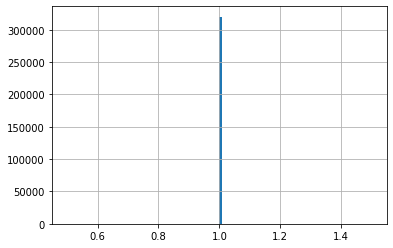

In [18]:
df.ratio=df.fundedamnt/df.loanamnt.astype(float,3)
df.ratio.hist(bins=100)
df[['fundedamnt','loanamnt']][:10]

##### Histogram

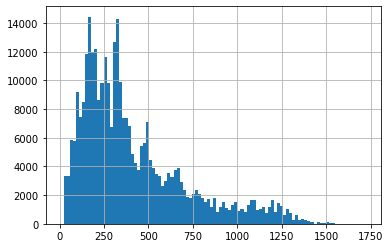

In [19]:
df.installment.hist(bins=100)

##### Mean response

In [20]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")

In [21]:
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [22]:
dummy_list = ["emplength", "verificationstatus", "delinq2yrs", "addrstate", 'homeownership', 
 "grade", "subgrade", "openacc"]
n = len(dummy_list)

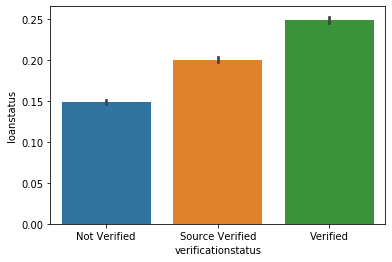

In [23]:
# why verified incomes gives higher default rates?

sns.barplot(x=dummy_list[1], y='loanstatus', data=df)

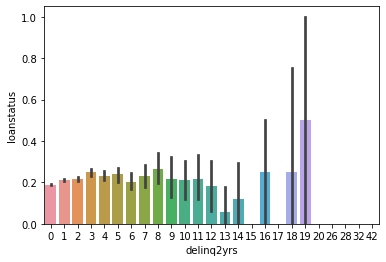

In [24]:
sns.barplot(x=dummy_list[2], y='loanstatus', data=df)

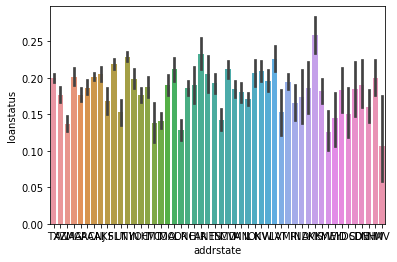

In [25]:
sns.barplot(x=dummy_list[3], y='loanstatus', data=df)

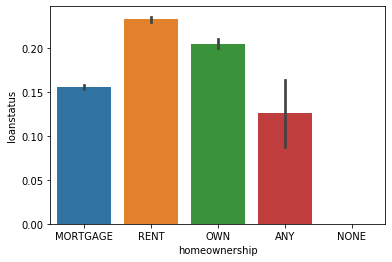

In [26]:
sns.barplot(x=dummy_list[4], y='loanstatus', data=df)

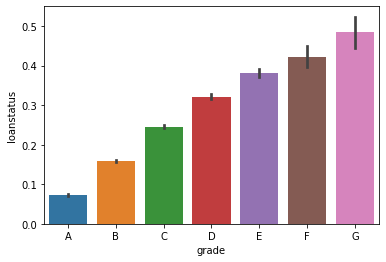

In [27]:
sns.barplot(x=dummy_list[5], y='loanstatus', data=df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [28]:
np.sort(df.subgrade.unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

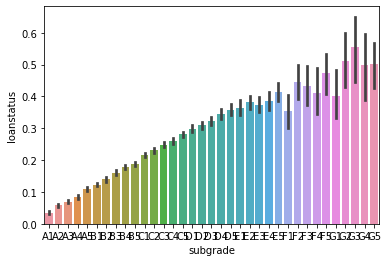

In [29]:
sns.barplot(x=dummy_list[6], y='loanstatus', data=df, order = np.sort(df.subgrade.unique()))

In [33]:
def countinuous_variable_plot(feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    factor = pd.qcut(df[feat_name], 5, labels = False) #groups the data act on groups #seperately
    table = df.groupby([factor, 'loanstatus']).size() #gets group size counts, hashed by the two variables
    table = table.unstack('loanstatus') #splits the data into 2 columns, 0, 1, each indexed by the
    normedtable = table.div(table.sum(1), axis=0) #divides the counts by the totals
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    normedtable.iloc[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10", ax = ax )
    ax.set_xlabel("%s percentile" % feat_name , fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(x, labels, rotation='0', fontsize = 18)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat_name )
    fig.savefig('age.jpg')

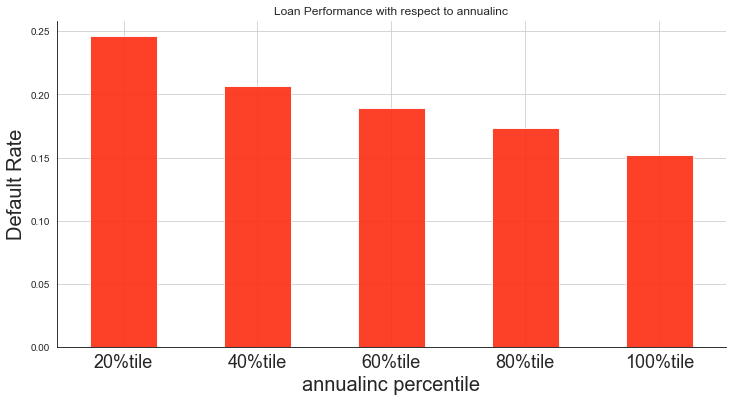

In [34]:
countinuous_variable_plot('annualinc')

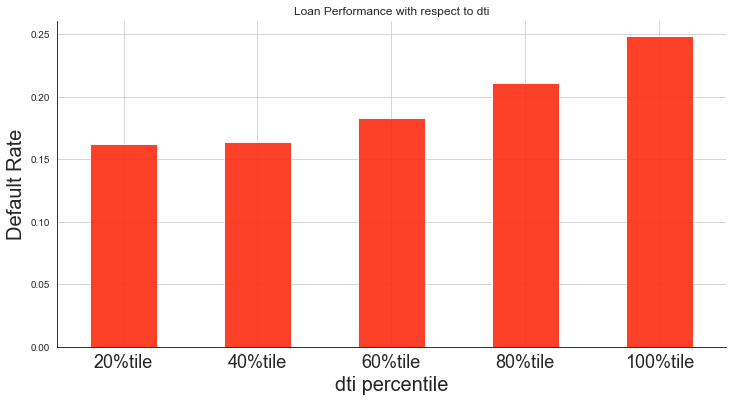

In [35]:
countinuous_variable_plot('dti')

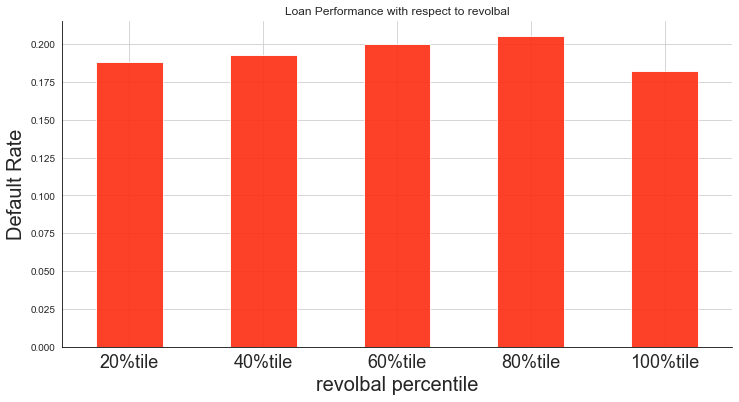

In [36]:
countinuous_variable_plot('revolbal')

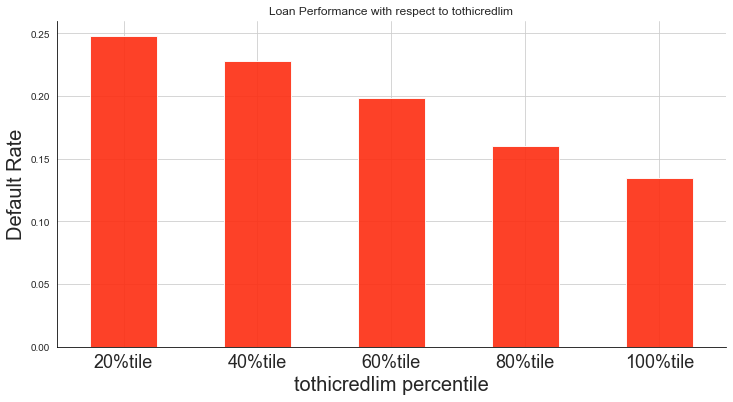

In [37]:
countinuous_variable_plot('tothicredlim')

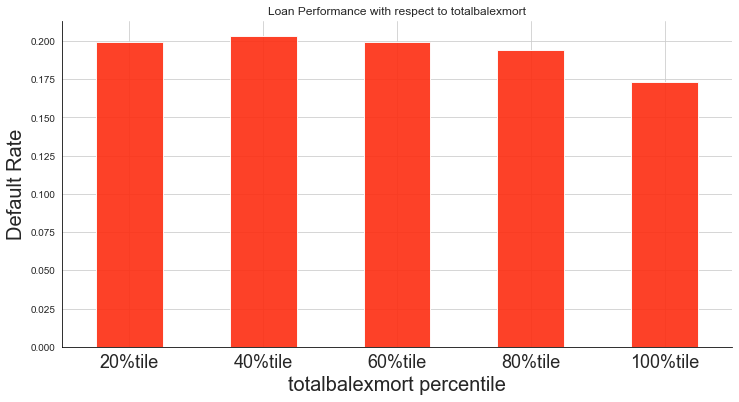

In [38]:
countinuous_variable_plot('totalbalexmort')

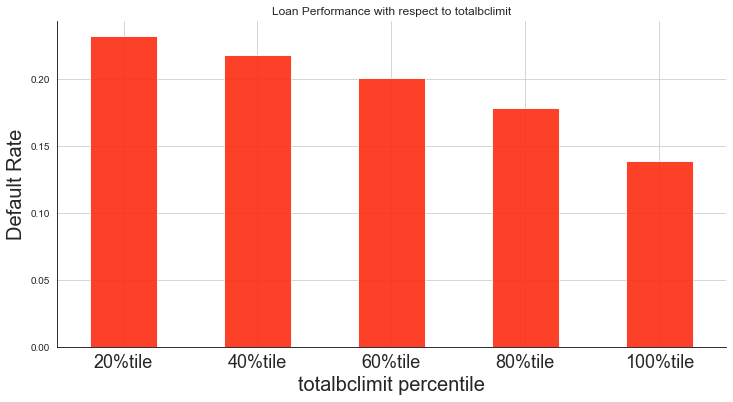

In [39]:
countinuous_variable_plot('totalbclimit')

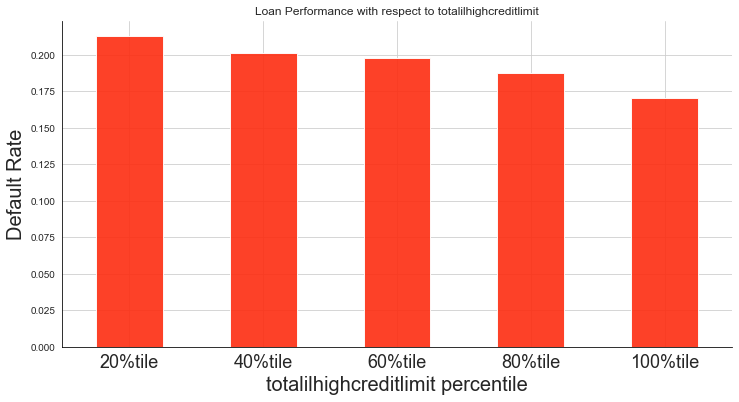

In [40]:
countinuous_variable_plot('totalilhighcreditlimit')